# Sheet 1

In [110]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## 1 Principal Component Analysis
### (a)

In [100]:

# PCA function implementation
def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))
    """
        #add a little bit of noise to data
    data += 0.01 * np.random.randn(*data.shape)
        # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    n = data.shape[1]
    x_centered = data - 1/n *data @ np.ones((n,n))
    
    # compute X times X transpose
    xxt = x_centered @ x_centered.T
    
    # compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(xxt)
    
    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    eigenvalues, eigenvectors = zip(*sorted(zip(eigenvalues,eigenvectors.T), reverse=True))
    components = np.array(eigenvectors[:n_components])
    
    # compute X_projected, the projection of the data to the components
    X_projected = x_centered.T @ components.T
    
    return components, X_projected.T  # return the n_components first components and the pca projection of the data

SyntaxError: invalid syntax (192675921.py, line 19)

In [73]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [101]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)

# Count the samples of each class
unique_labels, counts = np.unique(labels, return_counts=True)
print("Sample counts for each class:", dict(zip(label_names, counts)))


features.shape=(116, 2233), labels.shape=(2233,)
Sample counts for each class: {'b': np.int64(999), 'c': np.int64(864), 'q': np.int64(370)}


Normalize the data

Feature ranges (min, max): [(np.float64(0.5857568129500379), np.float64(1.0563076922743733)), (np.float64(-0.324), np.float64(0.3001)), (np.float64(-139.62783040862374), np.float64(145.8169283242588)), (np.float64(11.65252474327396), np.float64(20713.95643348941)), (np.float64(99860.37217253156), np.float64(100145.81693106721)), (np.float64(-0.9999999932105357), np.float64(-0.9782917490360855)), (np.float64(149256.83013332827), np.float64(2725986.9412642987)), (np.float64(94.02340841282924), np.float64(231315.8411330428)), (np.float64(155058.36476195962), np.float64(2728662.5177883604)), (np.float64(-134437.84306900043), np.float64(59292.72195058862)), (np.float64(-96619.36772098255), np.float64(188237.84080264496)), (np.float64(149077.9934216972), np.float64(2725850.600345601)), (np.float64(12928.3681490856), np.float64(197132.54104026855)), (np.float64(12928.3681490856), np.float64(197132.54104026855)), (np.float64(0.6189), np.float64(0.9555)), (np.float64(-0.4623), np.float64(0.3001

<function matplotlib.pyplot.show(close=None, block=None)>

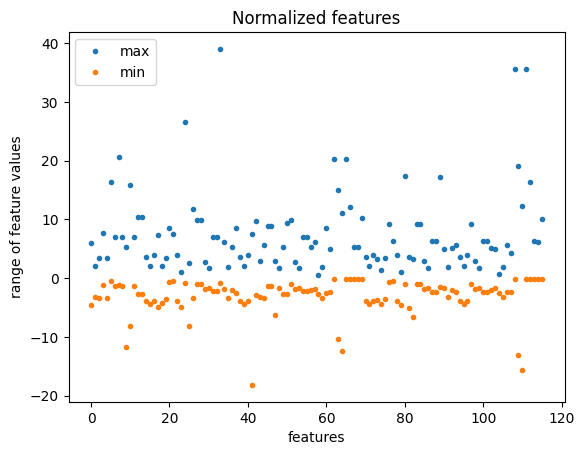

In [102]:
# TODO: report range of features and normalize the data to zero mean and unit variance

# Compute feature ranges
feature_min, feature_max = features.min(axis=1), features.max(axis=1)
print("Feature ranges (min, max):", list(zip(feature_min, feature_max)))

# Normalize the data to zero mean and unit variance
features_normalized = (features - features.mean(axis=1, keepdims=True)) / features.std(axis=1, keepdims=True)

max = np.max(features_normalized, axis=1)
min = np.min(features_normalized, axis=1)

plt.plot(np.arange(0,116,1), max, ".", label = "max")
plt.plot(np.arange(0,116,1), min, ".", label = "min")
plt.legend()
plt.xlabel("features")
plt.ylabel("range of feature values")
plt.title("Normalized features")
plt.show

### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label. Interpret your results.

In [103]:
# TODO: apply PCA as implemented in (a)

# Apply PCA to reduce data to 2 components
components, X_reduced = pca(features_normalized, n_components=2)


c:\Users\timon\OneDrive\Dokumente\GitHub\mlph_w24-\.conda\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\timon\OneDrive\Dokumente\GitHub\mlph_w24-\.conda\lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


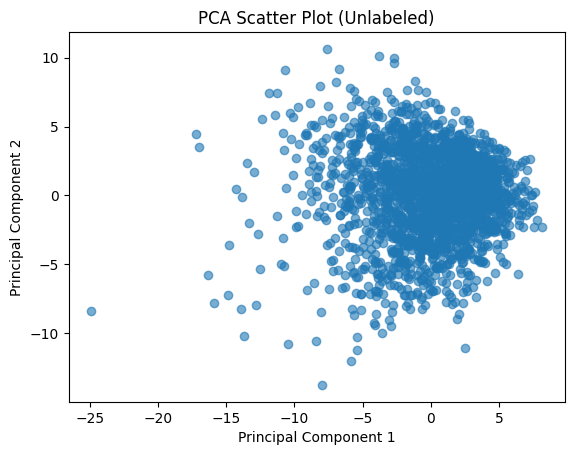

In [104]:
# TODO: make a scatterplot of the PCA projection

# Scatter plot of PCA projection
plt.scatter(X_reduced[0, :], X_reduced[1, :], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (Unlabeled)")
plt.show()


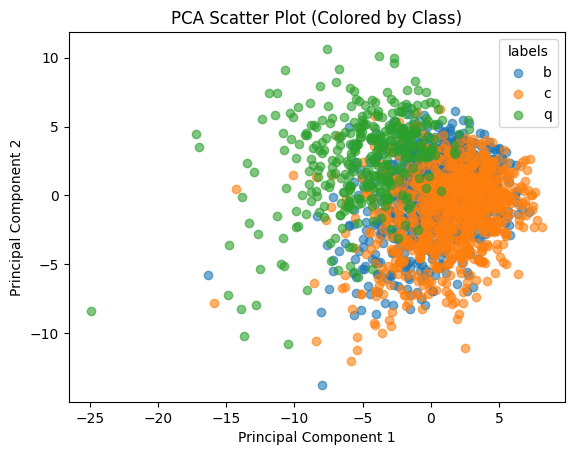

In [105]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels. Why could it be problematic to scatter the data sorted by labels though?)

# Scatter plot with color by label
for label, name in enumerate(label_names):
    plt.scatter(X_reduced[0, labels == label], X_reduced[1, labels == label], label=name, alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="labels")
plt.title("PCA Scatter Plot (Colored by Class)")
plt.show()


## 2 Nonlinear Dimension Reduction

In [106]:
import umap  # import umap-learn, see https://umap-learn.readthedocs.io/

In [107]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

### (a)

In [108]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!

reducer = umap.UMAP()

embedding = reducer.fit_transform(features.T)
embedding.shape

(2233, 2)

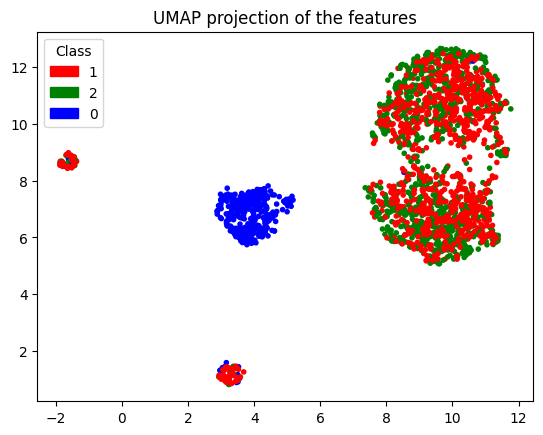

In [111]:
# TODO: make a scatterplot of the UMAP projection
color_box = ["red", "green", "blue"]
colors = [] 
for label in labels:
    colors.append(color_box[int(label)])

plt.scatter(embedding[:, 0], embedding[:, 1], marker=".", c=colors)
plt.title('UMAP projection of the features')

blue = mpatches.Patch(color='blue', label='0')
red = mpatches.Patch(color='red', label='1')
green = mpatches.Patch(color='green', label='2')

plt.legend(handles=[red, green, blue], title = "Class")

### (b)

In [ ]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names

embedding_list = []

fig, axs = plt.subplots(7, figsize = (5, 30))

n_neighbors_list = [2, 4, 8, 20, 50, 75, 100]

for i, n_neighbors in enumerate(n_neighbors_list):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(features.T)
    axs[i].scatter(embedding[:, 0], embedding[:, 1], marker=".", c=colors)
    embedding_list.append(embedding)

for i, ax in enumerate(axs):
    ax.tick_params(top=True, right=True, direction="in")
    ax.set_title(f"n_neighbors = {n_neighbors_list[i]}")
    ax.legend(handles=[red, green, blue], title = "Class")
